## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.

For this project, It emphasizes the results of an A/B test run by an e-commerce website.  The goal is to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [93]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#Importing seeds
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [94]:
#reading the file into pandas data frame
df= pd.read_csv('ab_data.csv')

In [95]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [97]:
df.group.value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

In [98]:
df.landing_page.value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

b. Use the below cell to find the number of rows in the dataset.

In [99]:
#dataframe number of rows
df.shape[0]

294478

c. The number of unique users in the dataset.

In [100]:
#unique ids in the dataset
df.user_id.nunique()

290584

d. The proportion of users converted.

In [101]:
#converted users where rows contains 1
converted = df.groupby('converted').user_id.nunique()[1]/df.user_id.nunique()

converted*100

12.104245244060237

e. The number of times the `new_page` and `treatment` don't line up.

In [102]:
#calcualting rows where groups and landing_page don't line up
not_lineup_1 = df.query("group == 'control' and landing_page =='new_page'").count()[0]
not_lineup_2 = df.query("group == 'treatment' and landing_page =='old_page'").count()[0]

not_lineup =not_lineup_1 + not_lineup_2

not_lineup

3893

f. Do any of the rows have missing values?

In [103]:
#rows with missing values
df.isnull().any(axis = 0).sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page, so we dropped those rows.
Then created a new dataset that meets the specifications, and saved it to **df2**

In [104]:
#dataframe where treatment group is aligned with new page
df_int1 = df.loc[(df['group'] == 'treatment') & (df['landing_page']== 'new_page')]

In [105]:
#dataframe where control group is aligned with old page
df_int2 = df.loc[(df['group'] == 'control') & (df['landing_page']== 'old_page')]

In [106]:
#dataframes concatenation
frames =[df_int1 , df_int2]
df2 = pd.concat(frames)

In [107]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [108]:
#checking no. of rows to make sure the (don't line up rows) are dropped
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 2 to 294476
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [109]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [110]:
#unique ids in df2
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [111]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


#### user_id = 773192

c. What is the row information for the repeat **user_id**? 

In [112]:
df2[df2.user_id.duplicated(keep= False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [113]:
#dropping one of the duplicates using index
df2= df2.drop([1899])

In [114]:
#testing the row is dropped
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [115]:
#probability an individual is converting
df2[df2["converted"]== 1].count()[0]/df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [116]:
#probability of an individual is converted given they are in control group
(df2.query('group == "control"')['converted']== 1).mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [117]:
#probability of an individual is converted given they are in treatment group
(df2.query('group == "treatment"')['converted']== 1).mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [118]:
df2[df2["landing_page"]== 'new_page'].count()[0]/df2.shape[0]

0.5000619442226688

**There is no sufficient evidence to say that the new treatment page leads to more conversions.  As, the probability of conversion of the control group is slightly higher than the probability of conversion of the treatment group. Although, the probability of individuals received a new page is almost equal 0.5 , which indicates there is no bias**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} \geq p_{new} $$
$$H_1: p_{old} < p_{new} $$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

In [119]:
#converted rate under the null
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [120]:
#according to the instructions above, p_old will be equal p_new
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [121]:
#number of rows having the new page
n_new = (df2[df2['landing_page']=='new_page']).shape[0]
n_new

145310

d. What is $n_{old}$?

In [122]:
#number of rows having the old page
n_old= (df2[df2['landing_page']=='old_page']).shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [168]:
#using random.choice
new_page_converted = np.random.choice([0, 1], n_new, p = [p_new, 1-p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [169]:
old_page_converted = np.random.choice([0, 1], n_old, p = [p_old, 1-p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [170]:
#calculating the observation difference
obs_diff= (new_page_converted.mean())-(old_page_converted.mean())
obs_diff

-0.0006243843092267332

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [171]:
#performing sampling distribution
p_diffs=[]
for i in range(10000):
    new_page_converted = np.random.choice([0, 1], n_new,replace= True, p = [p_new, 1-p_new])
    old_page_converted = np.random.choice([0, 1], n_old,replace=True, p = [p_old, 1-p_old])
    p_new_ =new_page_converted.mean()
    p_old_ =old_page_converted.mean()
    p_diffs.append(p_new_ - p_old_)
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

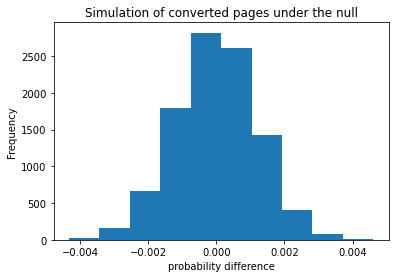

In [172]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.xlabel("probability difference");
plt.ylabel("Frequency");
plt.title("Simulation of converted pages under the null");

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

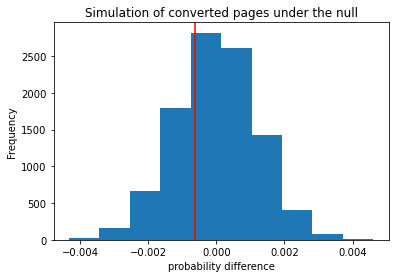

In [173]:
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');
plt.xlabel("probability difference");
plt.ylabel("Frequency");
plt.title("Simulation of converted pages under the null");

In [174]:
(p_diffs > obs_diff ).mean()

0.7008

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

### The value calculated in j, is called the p_value, which is the probability of observing our stastic from the null hypothesis, and it is computed =  0.7, and since it is greater than recommended value of alpha = 0.05 (which is the type 1 error rate), therefore we won't be able to reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [130]:
import statsmodels.api as sm

convert_old = (df2.query('group == "control" and converted == 1')).count()[0]
convert_new = (df2.query('group == "treatment" and converted == 1')).count()[0]
n_old = (df2[df2['landing_page']=='old_page']).shape[0]
n_new = (df2[df2['landing_page']=='new_page']).shape[0]

In [131]:
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [132]:
#performing ztest
from statsmodels.stats.proportion import proportions_ztest
count =[convert_old,convert_new]
nobs = [n_old,n_new]
stat, pval = proportions_ztest(count,nobs, alternative='smaller')

In [133]:
stat, pval

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The pval in the z-test is very high as the pval from the sampling distribution , which makes it consistent , so it ensures that we won't reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since we want to predict a categorical response, we will choose Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [134]:
#adding intercept column , adding dummy variable columns for (group column)
df2['intercept']=1
df2[['control','treatment']]= pd.get_dummies(df2['group'])

In [135]:
#testing
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


In [136]:
#renaming the treatment column with the suggested ab_page 
df2.rename(columns={'treatment':'ab_page'}, inplace=True)

In [137]:
#testing
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,0,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [138]:
import statsmodels.api as sm

In [139]:
logit_model = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [140]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:               8.077e-06
Time:                        01:04:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [141]:
np.exp(-0.0150)

0.9851119396030626

In [142]:
1/np.exp(-0.0150)

1.015113064615719

**the coefficient of the ab_page indicates that the the number of converted increases by 1.015 with the new page holding all other variables are constant**

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page = 0.19, higher than (alpha=0.05), so the coeffiecient is not stastically significant, also it is different than the previous p-value in part-ll . Logistic regression assumes that there is no relationships between the variables. The alternative hypothesis will be that the convertion rate of new page is not equal the convertion rate of old page**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Most of the times it is a good idea to consider other factors to add to the regression model as it will contribute to the significance of the result, but from its disadvantages that sometimes the model gets complex, or variables can be not linearly dependent, and this can lead us to higher order terms of cubic , quadratic and interaction , which would be difficult to interpert their coefficients**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [143]:
#reading countries csv into a dataframe and joing the two dataframes together
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [144]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [145]:
df_new.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [146]:
### Create the necessary dummy variables
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country'])

In [147]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [148]:
# adding addtional columns of interaction
df_new['ab_page_CA']=df_new['ab_page']*df_new['CA']
df_new['ab_page_UK']=df_new['ab_page']*df_new['UK']
df_new['ab_page_US']=df_new['ab_page']*df_new['US']

In [149]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US,ab_page_CA,ab_page_UK,ab_page_US
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,1,0


In [150]:
### Fit Your Linear Model And Obtain the Results

lm = sm.Logit(df_new['converted'],df_new[['intercept','ab_page','UK','US','ab_page_UK','ab_page_US']])
results=lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Jun 2021   Pseudo R-squ.:               3.482e-05
Time:                        01:04:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
ab_page_UK     0.0783      0.057      1.378      0.168      -0.033       0.190
ab_page_US     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

In [151]:
np.exp(-0.0674),np.exp(0.0118),np.exp(0.0175)

(0.9348211980618836, 1.011869894648401, 1.0176540221507617)

In [152]:
1/np.exp(-0.0674)

1.0697232819209153

**There is no noticeable significent effect based on the country** 

<a id='conclusions'></a>
## Conclusions

**All the logistic regression models done, and A/B test fail to reject the null, and stick with the old page**

 